### Naive Bayes on Spam dataset

https://www.kaggle.com/uciml/sms-spam-collection-dataset

#### 1.  Loading Data

In [51]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('spam.csv',encoding = "latin-1")


Observation : encoding = 'latin -1' is used to downlaod all special characters and everything in python

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Dropping NaN values

In [6]:
data.dropna(how="any",axis=1,inplace = True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
data.columns = ['target','message']

In [9]:
data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

Observation : The total ham messages are 4825 and spam messages are 747

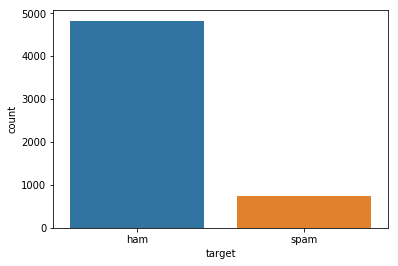

In [11]:
sns.countplot(x = 'target',data = data)

### Text Preprocessing 

In [13]:
#printing the random reviews
sent_0 = data['message'].values[0]
print(sent_0)
print("="*50)

sent_1000 = data['message'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = data['message'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = data['message'].values[4900]
print(sent_4900)
print("="*50)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
No..but heard abt tat..
Host-based IDPS for linux systems.
Taka lor. Wat time u wan 2 come n look 4 us?


In [14]:
def decontracted(phrase):
    phrase = re.sub(r"won\'t","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    phrase = re.sub(r"\'s"," is",phrase)
    phrase = re.sub(r"\'d"," would",phrase)
    phrase = re.sub(r"\'m","am",phrase)
    phrase = re.sub(r"\'re" , "are", phrase)
    phrase = re.sub(r"\'ve" , "have",phrase)
    phrase = re.sub(r"\'ll","will" , phrase)
    return phrase
    

In [15]:
sent_0 = decontracted(sent_0)
print(sent_0)
print("="*50)

sent_1000 = decontracted(sent_1000)
print(sent_1000)
print("="*50)

sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

sent_4900 = decontracted(sent_4900)
print(sent_4900)
print("="*50)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
No..but heard abt tat..
Host-based IDPS for linux systems.
Taka lor. Wat time u wan 2 come n look 4 us?


In [16]:
#remove words with numbers python
sent_0 = re.sub("\S*\d\S*","",sent_0).strip()
print(sent_0)

sent_1000 = re.sub("\S*\d\S*","",sent_1000).strip()
print(sent_1000)

sent_1500 = re.sub("\S*\d\S*","",sent_1500).strip()
print(sent_1500)

sent_4900 = re.sub("\S*\d\S*","",sent_4900).strip()
print(sent_4900)



Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
No..but heard abt tat..
Host-based IDPS for linux systems.
Taka lor. Wat time u wan  come n look  us?


In [17]:
#remove special character

sent_0 = re.sub('[^A-Za-z0-9]+',' ',sent_0)

print(sent_0)

sent_1000 = re.sub('[^A-za-z0-9]+',' ',sent_1000)
print(sent_1000)

sent_1500 = re.sub('[^A-Za-z0-9]+',' ',sent_1500)
print(sent_1500)

sent_4900 = re.sub('[^A-Za-z0-9]+',' ',sent_4900)
print(sent_4900)

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat 
No but heard abt tat 
Host based IDPS for linux systems 
Taka lor Wat time u wan come n look us 


In [20]:
from bs4 import BeautifulSoup

Soup = BeautifulSoup(sent_0,"lxml")
text = Soup.get_text()
print(text)
print("="*50)

Soup = BeautifulSoup(sent_1000,"lxml")
text = Soup.get_text()
print(text)
print("="*50)

Soup = BeautifulSoup(sent_1500,"lxml")
text = Soup.get_text()
print(text)
print("="*50)

Soup = BeautifulSoup(sent_4900,"lxml")
text = Soup.get_text()
print(text)
print("="*50)

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat 
No but heard abt tat 
Host based IDPS for linux systems 
Taka lor Wat time u wan come n look us 


In [21]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

### Combining all the above Stundents

In [22]:
from tqdm import tqdm
preprocessed_review = []
#tqdm is for printing the status bar
for sentance in tqdm(data['message'].values):
    sentance = decontracted(sentance)
    sentance = BeautifulSoup(sentance,"lxml").get_text()
    sentance = re.sub("\S*\d\S*","",sentance).strip()
    sentance = re.sub('[^A-Za-z0-9]+',' ',sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_review.append(sentance.strip())
    

100%|████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:04<00:00, 1381.58it/s]


In [25]:
preprocessed_review[1500]

'host based idps linux systems'

## Featurization

## Bag Of Words

In [27]:
count_vect = CountVectorizer()
count_vect.fit(preprocessed_review)
print("Some Feature Name:",count_vect.get_feature_names()[:10])
print("="*50)

#convert text to vector

final_counts = count_vect.transform(preprocessed_review)
print("The shape of count vectorizer:",final_counts.get_shape())

Some Feature Name: ['aa', 'aah', 'aaniye', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel']
The shape of count vectorizer: (5572, 7359)


### Bi-gram and n-Gram

In [28]:
count_vect_bigram = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
final_gram_count = count_vect_bigram.fit_transform(preprocessed_review)
print("The type of Bi-gram Vectorizer:",type(final_gram_count))
print("The shape of Bi-gram Vectorizer:",final_gram_count.get_shape())

The type of Bi-gram Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of Bi-gram Vectorizer: (5572, 1001)


### TF-IDF

In [30]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vect.fit(preprocessed_review)
print("Some Feature(Unique words in the Corpus):",tf_idf_vect.get_feature_names()[:10])
final_tf_idf_count = tf_idf_vect.transform(preprocessed_review)

print("The type of tf_idf vectorizer:",type(final_tf_idf_count))
print("The shape of tf_idf vectorizer:",final_tf_idf_count.get_shape())


Some Feature(Unique words in the Corpus): ['abiola', 'able', 'abt', 'account', 'account statement', 'across', 'across sea', 'actually', 'address', 'admirer']
The type of tf_idf vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of tf_idf vectorizer: (5572, 1001)


In [33]:
x = preprocessed_review
y = np.array(data['target'])

print(len(x))
print(len(y))

5572
5572


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


### Apply Naive Bayes

In [45]:
final_xtr = count_vect.fit_transform(x_train)
final_xtest = count_vect.transform(x_test)
model = MultinomialNB()

model.fit(final_xtr,y_train)


MultinomialNB()

In [47]:
y_pred = model.predict(final_xtest)

In [52]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9820531227566404


In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1186,   10],
       [  15,  182]], dtype=int64)

#### Apply Navie Bayes on TF-IDF

In [58]:
final_xtr = tf_idf_vect.fit_transform(x_train)
final_xtest = tf_idf_vect.transform(x_test)
model = MultinomialNB()

model.fit(final_xtr,y_train)

MultinomialNB()

In [59]:
y_pred = model.predict(final_xtest)

In [60]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9705671213208902


In [61]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1191,    5],
       [  36,  161]], dtype=int64)